In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv("test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


<AxesSubplot:ylabel='school_setting'>

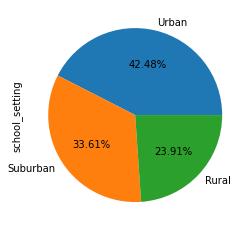

In [5]:
df["school_setting"].value_counts().plot.pie(autopct = "%.2f%%")

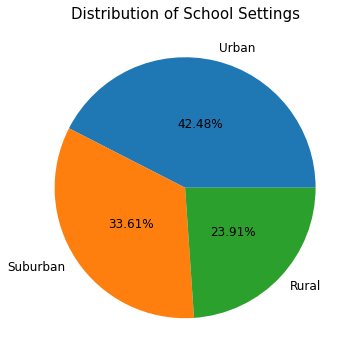

In [6]:
fig, ax = plt.subplots(figsize = (6, 6))
data = df["school_setting"].value_counts()
labels = data.keys()
plt.pie(x = data, autopct = "%.2f%%", labels = labels, pctdistance = 0.5, textprops = {"fontsize":12})
plt.title("Distribution of School Settings", fontsize = 15);

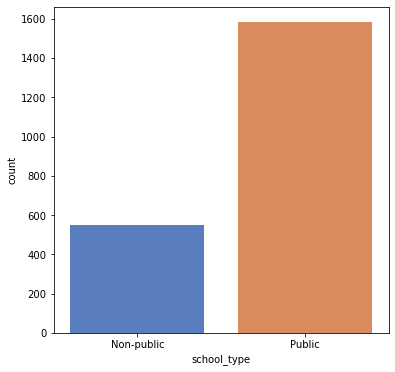

In [7]:
sns.set_palette("muted")
fig, ax = plt.subplots(figsize = (6, 6))
ax = sns.countplot(x = "school_type", data = df);

D:\Anu\MachineLearning\test_score_prediction\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


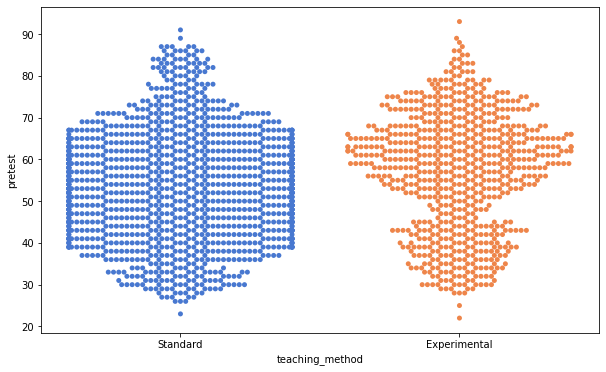

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.swarmplot(x = "teaching_method", y = "pretest", data = df);

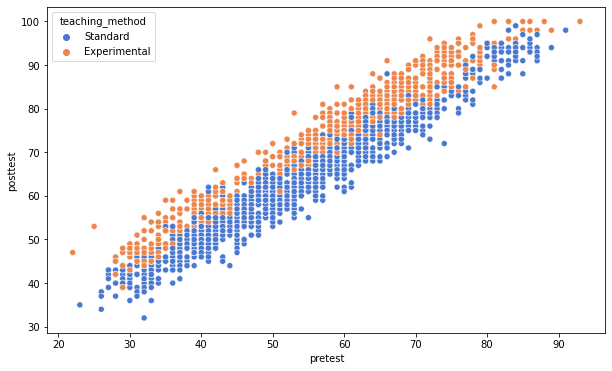

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.scatterplot(x = "pretest", y = "posttest", data = df, hue = "teaching_method");

This figure shows two things:
1. Posttest scores are directly proportional to pretest scores.
2. Students taught with Experimental method tend to score a bit higher in their posttest as compared to the students taught with Standard Method.

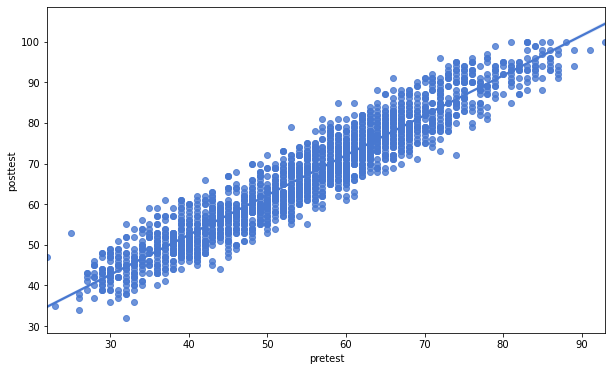

In [10]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.regplot(x = "pretest", y = "posttest", data = df);

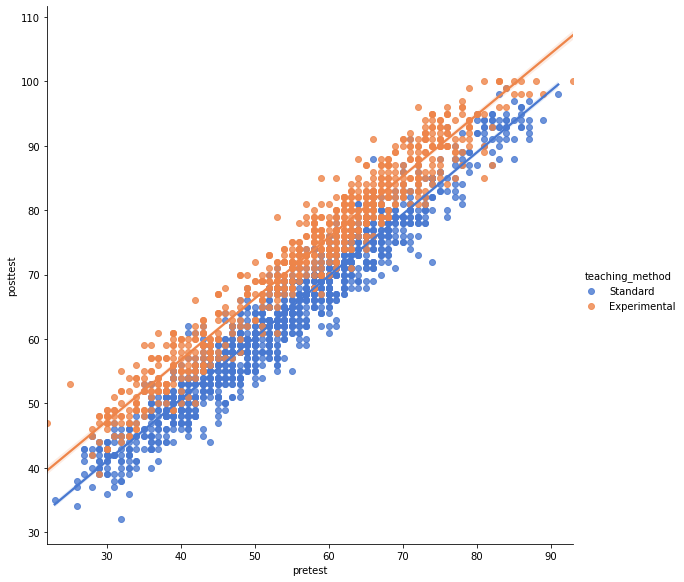

In [11]:
sns.lmplot(x = "pretest", y = "posttest", data = df, hue = "teaching_method", height = 8);

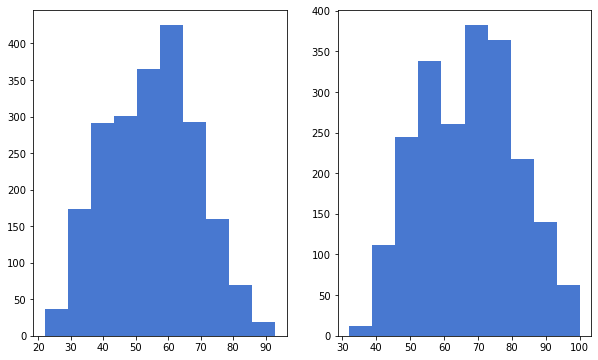

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
ax1.hist(df["pretest"])
ax2.hist(df["posttest"]);

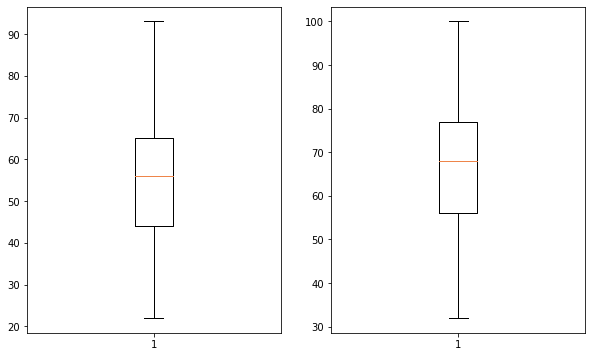

In [13]:
fig, (ax1, ax2) = plt.subplots(figsize = (10, 6), nrows = 1, ncols = 2)
ax1.boxplot(df["pretest"])
ax2.boxplot(df["posttest"]);

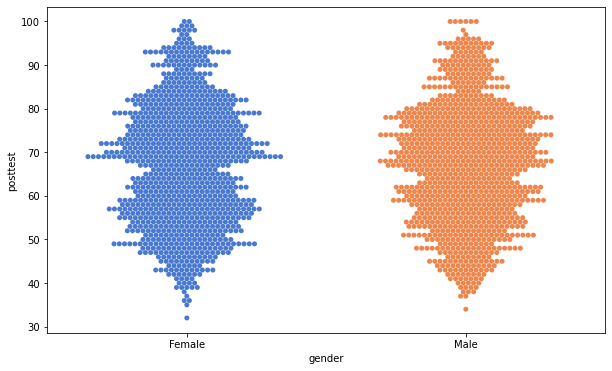

In [14]:
plt.figure(figsize = (10, 6))
sns.swarmplot(x = "gender", y = "posttest", data = df);

From this we observe that there is not much difference between of the posttest scores of males and females.

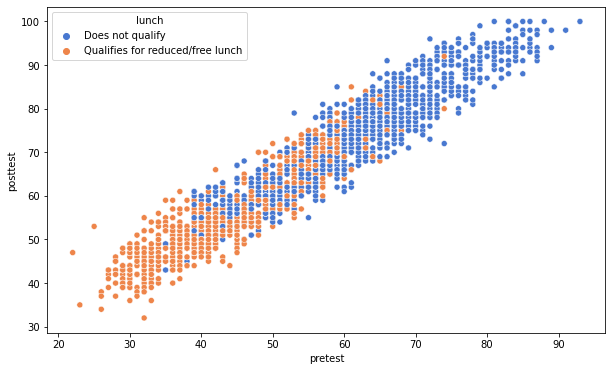

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.scatterplot(x = "pretest", y = "posttest", data = df, hue = "lunch");

Students who qualify for free lunch tend to score lesser marks (<60) than the students who do not qualify for free lunch in both pretest as well as posttest scores.

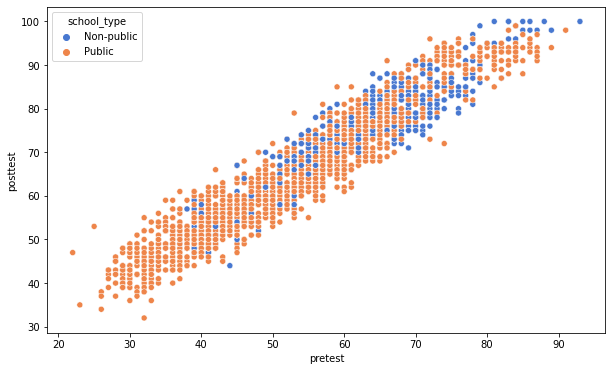

In [16]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.scatterplot(x = "pretest", y = "posttest", data = df, hue = "school_type");

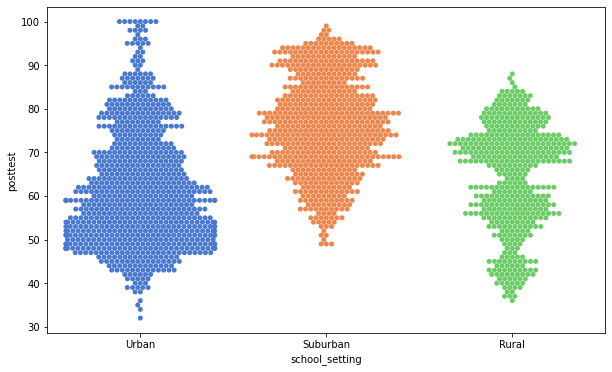

In [17]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.swarmplot(x = "school_setting", y = "posttest", data = df);

In [18]:
df["n_student"].value_counts()

22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64

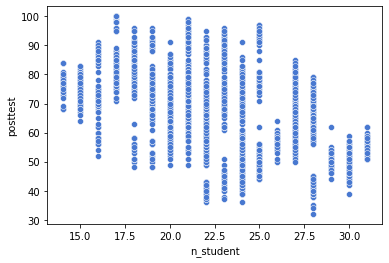

In [19]:
sns.scatterplot(x = "n_student", y = "posttest", data = df);

In [20]:
df_corr = df.corr()
df_corr

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


In [21]:
df["school"].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [22]:
df = df.drop("classroom", axis = 1)
df = df.drop("student_id", axis = 1)
df

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


In [23]:
for label, content in df.items():
    if label == "school":
        df[label] = content.astype("category").cat.as_ordered()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   school           2133 non-null   category
 1   school_setting   2133 non-null   object  
 2   school_type      2133 non-null   object  
 3   teaching_method  2133 non-null   object  
 4   n_student        2133 non-null   float64 
 5   gender           2133 non-null   object  
 6   lunch            2133 non-null   object  
 7   pretest          2133 non-null   float64 
 8   posttest         2133 non-null   float64 
dtypes: category(1), float64(3), object(5)
memory usage: 136.2+ KB


In [25]:
df["school"].cat.codes

0        0
1        0
2        0
3        0
4        0
        ..
2128    22
2129    22
2130    22
2131    22
2132    22
Length: 2133, dtype: int8

In [26]:
for label, content in df.items():
    if label == "school":
        df[label] = pd.Categorical(content).codes
        
df.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,0,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,0,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [27]:
df_tmp = df.copy()
df_tmp.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,0,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,0,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,0,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [28]:
df_tmp = pd.get_dummies(df_tmp, columns = ["school_setting", "school_type", "teaching_method", "gender", "lunch"], drop_first = True)
df_tmp.head()

,school,n_student,pretest,posttest,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,0,20.0,62.0,72.0,0,1,0,1,0,0
1,0,20.0,66.0,79.0,0,1,0,1,0,0
2,0,20.0,64.0,76.0,0,1,0,1,1,0
3,0,20.0,61.0,77.0,0,1,0,1,0,0
4,0,20.0,64.0,76.0,0,1,0,1,1,0


In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("posttest", axis = 1)
y = df_tmp["posttest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1706, 9), (1706,), (427, 9), (427,))

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
model.score(X_test, y_test)

0.9438706787337432

In [33]:
#pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
from xgboost import XGBRegressor

np.random.seed(42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_model.score(X_test, y_test)

0.942645595045169

In [37]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mean_absolute_error(y_test, y_preds)

2.6479288673205534

In [38]:
mae = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

mae

,actual values,predictions
282,68.0,65.391905
2014,87.0,87.111333
1719,70.0,72.181333
994,61.0,61.553333
2033,63.0,57.461333
...,...,...
1474,94.0,92.985000
1776,75.0,77.790167
2115,48.0,53.060853
192,81.0,85.695000


In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

11.289979417268725

In [41]:
np.sqrt(mse)

3.360056460428712